<a href="https://colab.research.google.com/github/SergJohn/Crypto-Prediction-2022-Project/blob/main/Prophet_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install --upgrade pandas pip install --upgrade pandas-datareader

     |████████████████████████████████| 2.1 MB 7.8 MB/s 
     |████████████████████████████████| 109 kB 54.0 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [2]:
pip install pandas-datareader


In [3]:
!pip install pystan fbprophet


In [15]:
import pandas as pd
from fbprophet import Prophet

In [16]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [52]:
# Data1 Using static Dataset from Yahoo Finance, data from 2014 afterwards
data_btc = pd.read_csv('BTC-Hourly.csv')

In [51]:
# Data2 Getting Yahoo Finance from pdr = data from 2020 afterwards
data_btc = pdr.get_data_yahoo('BTC')

In [70]:
data_btc.count()


ds    33259
y     33259
dtype: int64

In [54]:
data_btc.info

<bound method DataFrame.info of              unix                 date   symbol      open      high       low  \
0      1646092800  2022-03-01 00:00:00  BTC/USD  43221.71  43626.49  43185.48   
1      1646089200  2022-02-28 23:00:00  BTC/USD  43085.30  43364.81  42892.37   
2      1646085600  2022-02-28 22:00:00  BTC/USD  41657.23  44256.08  41650.29   
3      1646082000  2022-02-28 21:00:00  BTC/USD  41917.09  41917.09  41542.60   
4      1646078400  2022-02-28 20:00:00  BTC/USD  41361.99  41971.00  41284.11   
...           ...                  ...      ...       ...       ...       ...   
33254  1526378400  2018-05-15 10:00:00  BTC/USD   8708.32   8865.00   8695.11   
33255  1526374800  2018-05-15 09:00:00  BTC/USD   8728.49   8754.40   8701.35   
33256  1526371200  2018-05-15 08:00:00  BTC/USD   8739.00   8750.27   8660.53   
33257  1526367600  2018-05-15 07:00:00  BTC/USD   8740.99   8766.00   8721.11   
33258  1526364000  2018-05-15 06:00:00  BTC/USD   8733.86   8796.68   8707.28

In [55]:
# For Data2 - Transforming the index in a Date columns
data_btc=data_btc.reset_index()

In [56]:
data_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33259 entries, 0 to 33258
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       33259 non-null  int64  
 1   unix        33259 non-null  int64  
 2   date        33259 non-null  object 
 3   symbol      33259 non-null  object 
 4   open        33259 non-null  float64
 5   high        33259 non-null  float64
 6   low         33259 non-null  float64
 7   close       33259 non-null  float64
 8   Volume BTC  33259 non-null  float64
 9   Volume USD  33259 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 2.5+ MB


In [57]:
# For Data2
data_btc.drop(['unix','symbol','open', 'high', 'low', 'Volume BTC','Volume USD'], axis=1, inplace=True)

In [59]:
# For Data2
data_btc.drop(['index'], axis=1, inplace=True)

In [58]:
data_btc.head()

,index,date,close
0,0,2022-03-01 00:00:00,43312.27
1,1,2022-02-28 23:00:00,43178.98
2,2,2022-02-28 22:00:00,42907.32
3,3,2022-02-28 21:00:00,41659.53
4,4,2022-02-28 20:00:00,41914.97


In [60]:
data_btc.columns = ['ds','y']

In [72]:
data_btc.tail()

,ds,y
33254,2018-05-15 10:00:00,8795.90
33255,2018-05-15 09:00:00,8708.32
33256,2018-05-15 08:00:00,8728.49
33257,2018-05-15 07:00:00,8739.00
33258,2018-05-15 06:00:00,8740.99


In [73]:
data_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33259 entries, 0 to 33258
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      33259 non-null  object 
 1   y       33259 non-null  float64
dtypes: float64(1), object(1)
memory usage: 519.8+ KB


In [74]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [75]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
# Check the code below
model = m.fit(data_btc)

In [76]:
future = m.make_future_dataframe(periods=100, freq='H')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-05-15 06:00:00,16057.387639,6348.142922,14015.615065,16057.387639,16057.387639,-5964.611779,-5964.611779,-5964.611779,-11.330667,...,3.341403,3.341403,3.341403,-5956.622515,-5956.622515,-5956.622515,0.0,0.0,0.0,10092.775859
1,2018-05-15 07:00:00,16061.579811,6232.572116,13860.692313,16061.579811,16061.579811,-5977.105280,-5977.105280,-5977.105280,-7.707828,...,0.429395,0.429395,0.429395,-5969.826847,-5969.826847,-5969.826847,0.0,0.0,0.0,10084.474531
2,2018-05-15 08:00:00,16065.771983,6255.919585,13774.298634,16065.771983,16065.771983,-5993.505757,-5993.505757,-5993.505757,-8.049703,...,-2.398751,-2.398751,-2.398751,-5983.057303,-5983.057303,-5983.057303,0.0,0.0,0.0,10072.266226
3,2018-05-15 09:00:00,16069.964156,5957.234435,14068.777976,16069.964156,16069.964156,-6012.068240,-6012.068240,-6012.068240,-10.658886,...,-5.095686,-5.095686,-5.095686,-5996.313668,-5996.313668,-5996.313668,0.0,0.0,0.0,10057.895915
4,2018-05-15 10:00:00,16074.156328,6151.222617,13920.311457,16074.156328,16074.156328,-6028.919061,-6028.919061,-6028.919061,-11.707766,...,-7.615566,-7.615566,-7.615566,-6009.595728,-6009.595728,-6009.595728,0.0,0.0,0.0,10045.237267


In [78]:
r2_score(data_btc,forecast)

SyntaxError: ignored

In [66]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
33354,2022-03-05 00:00:00,40221.709610,33856.263377,41576.004357,40202.540476,40263.110365,-2466.590498,-2466.590498,-2466.590498,20.295525,...,4.594307,4.594307,4.594307,-2491.480330,-2491.480330,-2491.480330,0.0,0.0,0.0,37755.119113
33355,2022-03-05 01:00:00,40220.552066,34100.622242,41516.502942,40198.019857,40264.538936,-2476.064352,-2476.064352,-2476.064352,13.289732,...,9.489354,9.489354,9.489354,-2498.843438,-2498.843438,-2498.843438,0.0,0.0,0.0,37744.487714
33356,2022-03-05 02:00:00,40219.394521,33949.626968,41784.875838,40193.499237,40265.967507,-2491.304782,-2491.304782,-2491.304782,0.798346,...,14.074818,14.074818,14.074818,-2506.177946,-2506.177946,-2506.177946,0.0,0.0,0.0,37728.089739
33357,2022-03-05 03:00:00,40218.236976,33976.294271,41861.769512,40188.978617,40267.396078,-2506.534391,-2506.534391,-2506.534391,-11.354214,...,18.303511,18.303511,18.303511,-2513.483688,-2513.483688,-2513.483688,0.0,0.0,0.0,37711.702585
33358,2022-03-05 04:00:00,40217.079431,33599.990164,41712.872993,40184.457998,40268.824649,-2516.155757,-2516.155757,-2516.155757,-17.528258,...,22.132998,22.132998,22.132998,-2520.760497,-2520.760497,-2520.760497,0.0,0.0,0.0,37700.923674


In [67]:
forecast[['ds','yhat']]

,ds,yhat
0,2018-05-15 06:00:00,10092.775859
1,2018-05-15 07:00:00,10084.474531
2,2018-05-15 08:00:00,10072.266226
3,2018-05-15 09:00:00,10057.895915
4,2018-05-15 10:00:00,10045.237267
...,...,...
33354,2022-03-05 00:00:00,37755.119113
33355,2022-03-05 01:00:00,37744.487714
33356,2022-03-05 02:00:00,37728.089739
33357,2022-03-05 03:00:00,37711.702585


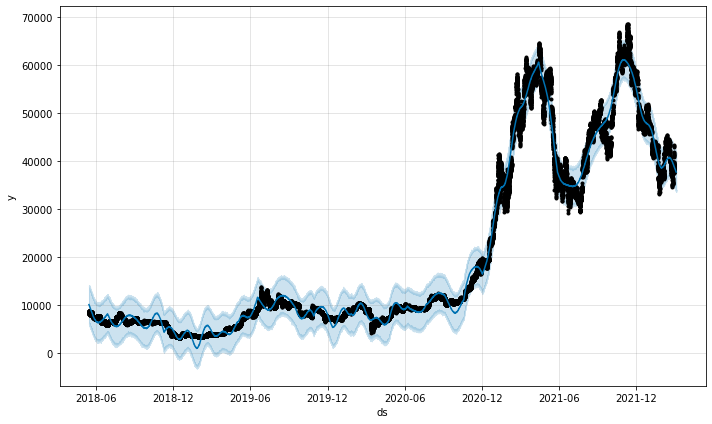

In [68]:
plot1 = m.plot(forecast)

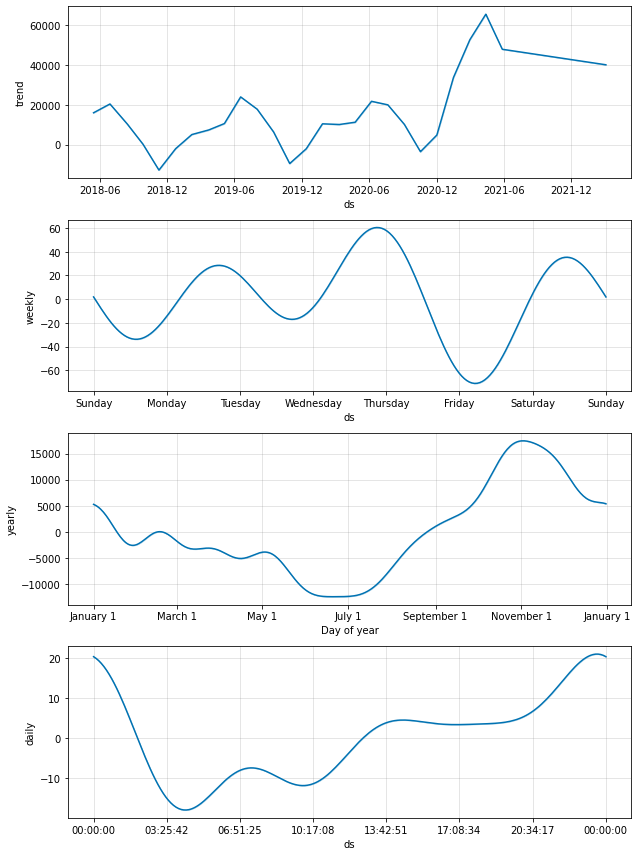

In [69]:
plot2 = m.plot_components(forecast)